## Red Wine Quality

```redwine-quality.ipynb```

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./winequality-red.csv')

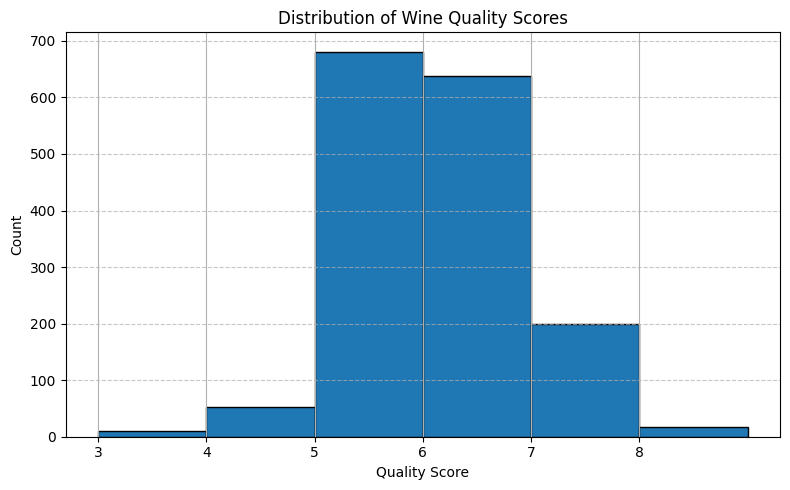

In [9]:
# ÌäπÏÑ± ÏÇ¥Ìé¥Î≥¥Í∏∞ (ÌíàÏßà Î∂ÑÌè¨, ÌûàÏä§ÌÜ†Í∑∏Îû®)

# ÌíàÏßà(quality) ÏπºÎüº Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
df['quality'].hist(
    bins=range(int(df['quality'].min()), int(df['quality'].max()) + 2),
    edgecolor='black'
)

# 3. Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.xticks(range(int(df['quality'].min()), int(df['quality'].max()) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 4. Í≤∞Í≥º Ï∂úÎ†•
plt.show()

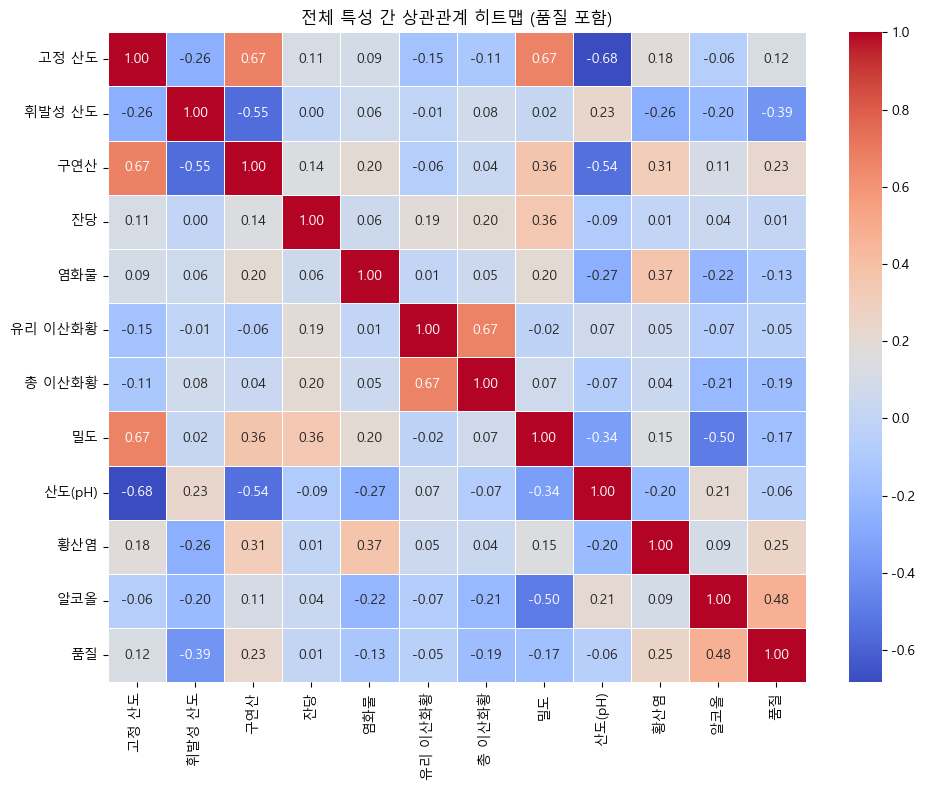

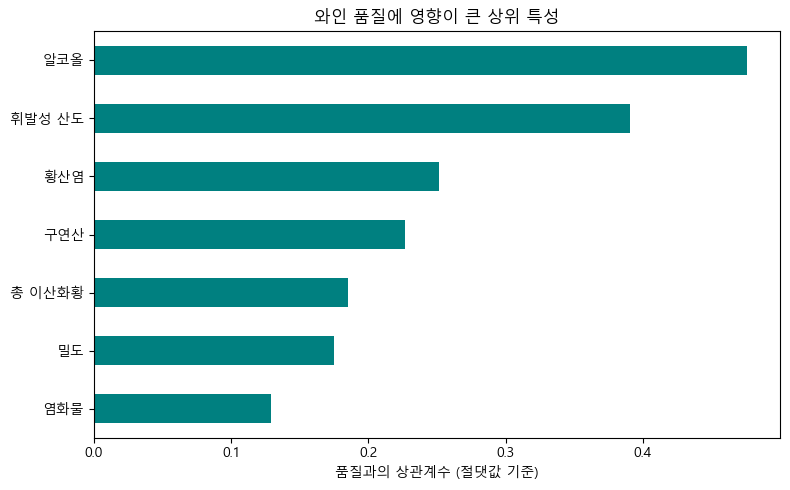

In [11]:
# ÌíàÏßàÍ≥ºÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (ÌûàÌä∏Îßµ) / ÌíàÏßàÏóê ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Ï£ºÎäî ÌäπÏÑ±Îì§ ÏãúÍ∞ÅÌôî

# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./winequality-red.csv')

# 3. Ïª¨ÎüºÎ™Ö ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
col_name_map = {
    'fixed acidity': 'Í≥†Ï†ï ÏÇ∞ÎèÑ',
    'volatile acidity': 'ÌúòÎ∞úÏÑ± ÏÇ∞ÎèÑ',
    'citric acid': 'Íµ¨Ïó∞ÏÇ∞',
    'residual sugar': 'ÏûîÎãπ',
    'chlorides': 'ÏóºÌôîÎ¨º',
    'free sulfur dioxide': 'Ïú†Î¶¨ Ïù¥ÏÇ∞ÌôîÌô©',
    'total sulfur dioxide': 'Ï¥ù Ïù¥ÏÇ∞ÌôîÌô©',
    'density': 'Î∞ÄÎèÑ',
    'pH': 'ÏÇ∞ÎèÑ(pH)',
    'sulphates': 'Ìô©ÏÇ∞Ïóº',
    'alcohol': 'ÏïåÏΩîÏò¨',
    'quality': 'ÌíàÏßà'
}
df.rename(columns=col_name_map, inplace=True)

# 4. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ Î∞è ÌûàÌä∏Îßµ
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Ï†ÑÏ≤¥ ÌäπÏÑ± Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ (ÌíàÏßà Ìè¨Ìï®)")
plt.tight_layout()
plt.show()

# 5. ÌíàÏßàÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏÉÅÏúÑ ÌäπÏÑ± ÏãúÍ∞ÅÌôî
quality_corr = correlation['ÌíàÏßà'].drop('ÌíàÏßà')
top_features = quality_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
top_features.head(7).sort_values().plot(kind='barh', color='teal')
plt.title("ÏôÄÏù∏ ÌíàÏßàÏóê ÏòÅÌñ•Ïù¥ ÌÅ∞ ÏÉÅÏúÑ ÌäπÏÑ±")
plt.xlabel("ÌíàÏßàÍ≥ºÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ï†àÎåìÍ∞í Í∏∞Ï§Ä)")
plt.tight_layout()
plt.show()

In [22]:
# ÌõàÎ†® ÌÖåÏä§Ìä∏ ÏÖã ÎÇòÎàÑÍ∏∞

from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('./winequality-red.csv')
X = df.drop('quality', axis=1)
y = df['quality']

# 80% ÌïôÏäµ / 20% ÌÖåÏä§Ìä∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"ÌõàÎ†® ÏÉòÌîå Ïàò: {len(X_train)}Í∞ú")
print(f"ÌÖåÏä§Ìä∏ ÏÉòÌîå Ïàò: {len(X_test)}Í∞ú")

ÌõàÎ†® ÏÉòÌîå Ïàò: 1199Í∞ú
ÌÖåÏä§Ìä∏ ÏÉòÌîå Ïàò: 400Í∞ú


üìà MAE (ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®): 0.5056
üìâ RMSE (ÌèâÍ∑† Ï†úÍ≥±Í∑º Ïò§Ï∞®): 0.6595
üîç R¬≤ Score (ÏÑ§Î™ÖÎ†•): 0.3346


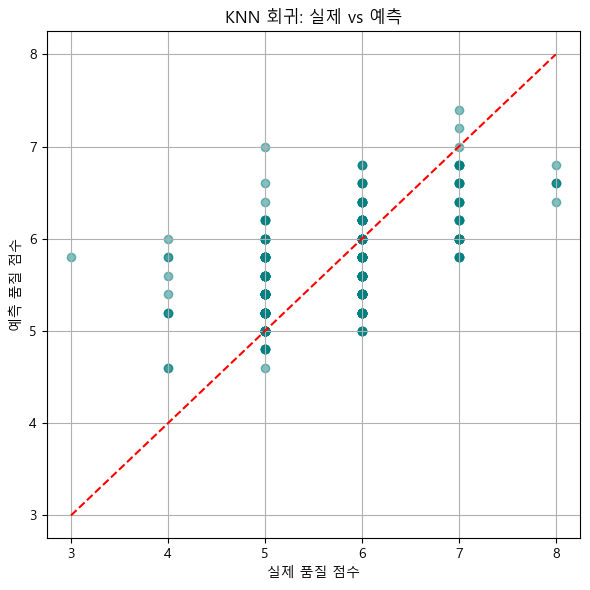

In [23]:
# KNN ÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏°

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import platform

# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Í∑∏ÎûòÌîÑÏö©, ÏÑ†ÌÉùÏÇ¨Ìï≠)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./winequality-red.csv')

# 3. ÏûÖÎ†•/ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X = df.drop('quality', axis=1)
y = df['quality']

# 4. ÌõàÎ†®/ÌÖåÏä§Ìä∏ ÎÇòÎàÑÍ∏∞
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Ïä§ÏºÄÏùºÎßÅ (KNNÏùÄ Í±∞Î¶¨ Í∏∞Î∞òÏù¥ÎØÄÎ°ú ÌëúÏ§ÄÌôî ÌïÑÏàò)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. KNN ÌöåÍ∑Ä Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
knn = KNeighborsRegressor(n_neighbors=5)  # k=5
knn.fit(X_train_scaled, y_train)

# 7. ÏòàÏ∏° Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # ‚Üê Ïó¨Í∏∞ ÏàòÏ†ï!
r2 = r2_score(y_test, y_pred)

print(f"üìà MAE (ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®): {mae:.4f}")
print(f"üìâ RMSE (ÌèâÍ∑† Ï†úÍ≥±Í∑º Ïò§Ï∞®): {rmse:.4f}")
print(f"üîç R¬≤ Score (ÏÑ§Î™ÖÎ†•): {r2:.4f}")

# 8. Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Í∏∞Ï§ÄÏÑ†
plt.xlabel("Ïã§Ï†ú ÌíàÏßà Ï†êÏàò")
plt.ylabel("ÏòàÏ∏° ÌíàÏßà Ï†êÏàò")
plt.title("KNN ÌöåÍ∑Ä: Ïã§Ï†ú vs ÏòàÏ∏°")
plt.grid(True)
plt.tight_layout()
plt.show()


[ÌõàÎ†®ÏÖã]
üìà MAE: 0.4996
üìâ RMSE: 0.6513
üîç R¬≤: 0.3480

[ÌÖåÏä§Ìä∏ÏÖã]
üìà MAE: 0.5035
üìâ RMSE: 0.6245
üîç R¬≤: 0.4032


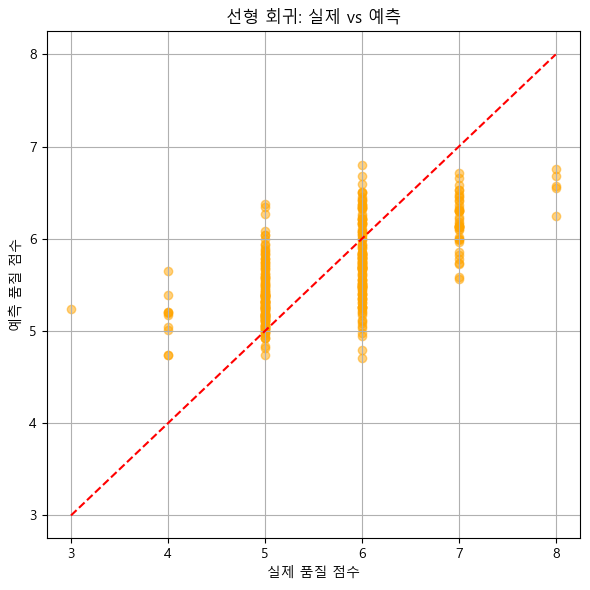

In [ ]:
# ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú ÏôÄÏù∏ ÌíàÏßà ÏòàÏ∏° (ÌõàÎ†®ÏÖã / ÌÖåÏä§Ìä∏ÏÖãÏùò Ï†êÏàòÎ•º ÎÜíÏó¨Î≥¥Ïûê)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import platform

# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏÑ†ÌÉù)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./winequality-red.csv')

# 3. ÏûÖÎ†•(X), ÌÉÄÍ≤ü(y) Î∂ÑÎ¶¨
X = df.drop('quality', axis=1)
y = df['quality']

# 4. ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. ÌëúÏ§ÄÌôî (ÏÑ†Ìòï ÌöåÍ∑ÄÎäî Ïä§ÏºÄÏùº ÎØºÍ∞êÌïòÎØÄÎ°ú ÌïÑÏàò!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 7. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# 8. ÌèâÍ∞Ä ÏßÄÌëú Ï∂úÎ†•
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n[{dataset_name}]")
    print(f"üìà MAE: {mae:.4f}")
    print(f"üìâ RMSE: {rmse:.4f}")
    print(f"üîç R¬≤: {r2:.4f}")

evaluate_model(y_train, y_train_pred, "ÌõàÎ†®ÏÖã")
evaluate_model(y_test, y_test_pred, "ÌÖåÏä§Ìä∏ÏÖã")

# 9. ÏãúÍ∞ÅÌôî: Ïã§Ï†ú vs ÏòàÏ∏° (ÌÖåÏä§Ìä∏ÏÖã)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Ïã§Ï†ú ÌíàÏßà Ï†êÏàò")
plt.ylabel("ÏòàÏ∏° ÌíàÏßà Ï†êÏàò")
plt.title("ÏÑ†Ìòï ÌöåÍ∑Ä: Ïã§Ï†ú vs ÏòàÏ∏°")
plt.grid(True)
plt.tight_layout()
plt.show()


üìå [Ridge ÌöåÍ∑Ä (L2 Ï†ïÍ∑úÌôî)]
MAE: 0.5036
RMSE: 0.6245
R¬≤: 0.4032

üìå [Lasso ÌöåÍ∑Ä (L1 Ï†ïÍ∑úÌôî)]
MAE: 0.5497
RMSE: 0.6627
R¬≤: 0.3279


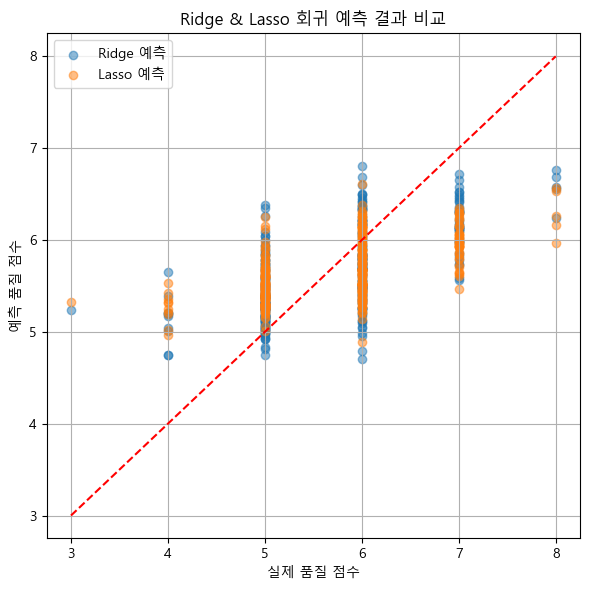

In [19]:
# Ridge, Lasso Î°ú Í∑úÏ†úÌï¥Í∞ÄÎ©∞ ÏòàÏ∏° 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import platform

# 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('./winequality-red.csv')

# 3. ÏûÖÎ†•/ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X = df.drop('quality', axis=1)
y = df['quality']

# 4. ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Î™®Îç∏ Ï†ïÏùò (Ridge & Lasso)
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# 7. ÏòàÏ∏°
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

# 8. ÌèâÍ∞Ä Ìï®Ïàò
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\nüìå [{name}]")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R¬≤: {r2:.4f}")

# 9. Î™®Îç∏ ÌèâÍ∞Ä
evaluate_model("Ridge ÌöåÍ∑Ä (L2 Ï†ïÍ∑úÌôî)", y_test, ridge_pred)
evaluate_model("Lasso ÌöåÍ∑Ä (L1 Ï†ïÍ∑úÌôî)", y_test, lasso_pred)

# 10. ÏãúÍ∞ÅÌôî: Ïã§Ï†ú vs ÏòàÏ∏° (ÎπÑÍµê)
plt.figure(figsize=(6,6))
plt.scatter(y_test, ridge_pred, label="Ridge ÏòàÏ∏°", alpha=0.5)
plt.scatter(y_test, lasso_pred, label="Lasso ÏòàÏ∏°", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Ïã§Ï†ú ÌíàÏßà Ï†êÏàò")
plt.ylabel("ÏòàÏ∏° ÌíàÏßà Ï†êÏàò")
plt.title("Ridge & Lasso ÌöåÍ∑Ä ÏòàÏ∏° Í≤∞Í≥º ÎπÑÍµê")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()